In [2]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup

In [3]:
# Part 1, data of around 120,000 stars
with open('hygdata_v3.csv', 'r') as f:
    lines = f.read().split('\n') # split each line

data = []
for line in lines[1:-1]:
    data.append(line.split(',')) # split each element

In [63]:
# Extract necessary information
ra      = [float(data[i][7]) for i in range(len(data))]
dec     = [float(data[i][8]) for i in range(len(data))]
mag     = [float(data[i][13]) for i in range(len(data))]
spec    = [data[i][15] for i in range(len(data))]
var     = [data[i][-3] for i in range(len(data))]
var_min = [data[i][-2] for i in range(len(data))]
var_max = [data[i][-1] for i in range(len(data))]

In [64]:
min(ra), max(ra), min(dec), max(dec)

(6e-05, 23.998594, -89.782428, 89.569427)

In [65]:
# Counting the stars of required spectral class (and essentially check if there is any error thrown)
o_count, b_count, f_count, m_count = 0, 0, 0, 0
for i in range(len(spec)):
    if spec[i] == '':
        continue
    elif spec[i][0] == 'O':
        o_count += 1
    elif spec[i][0] == 'B':
        b_count += 1
    elif spec[i][0] == 'F':
        f_count += 1
    elif spec[i][0] == 'M':
        m_count += 1
print(o_count, b_count, f_count, m_count)

264 10413 25602 5240


In [66]:
# Counting the variable stars  (and essentially check if there is any error thrown)
c1, c2, c3, c4 = 0, 0, 0, 0
for i in range(len(data)):
    if var[i] != '' and var_max[i] == '':
        c1 += 1;
    elif var[i] == '' and var_max[i] != '':
        c2 += 1;
    elif var[i] != '' and var_max[i] != '':
        c3 += 1;
    elif var[i] == '' and var_max[i] == '':
        c4 += 1
print(c1, c2, c3, c4)
# c1, c2, c3 are the stars which show variable magnitude.
# (Either they have a variable type specified and/or var_min and var_max is given.)
# You can check that either both var_max and var_min are specified or none of them is.
# You would have 16991 stars, but here, you have exactly 17000 because you would have missed the first case, anyway there are only 9 of them.

9 11010 5981 102613


In [67]:
# Now, we get the ra, dec and marker size for the stars
fi = [(10**(-mag[i]/2.5))*1500 for i in range(len(data))]

o_ra, o_dec, o_ms, \
b_ra, b_dec, b_ms, \
f_ra, f_dec, f_ms, \
m_ra, m_dec, m_ms, \
var_ra, var_dec, \
non_var_ra, non_var_dec, non_var_ms \
    = ([] for i in range(17))

for i in range(len(spec)):
    # Spectral class
    if spec[i] == '':
        pass # Does nothing
    elif spec[i][0] == 'O': # Belonging to spectral class O
        o_ra.append(ra[i])
        o_dec.append(dec[i])
        o_ms.append(fi[i])
    elif spec[i][0] == 'B': # Belonging to spectral class B
        b_ra.append(ra[i])
        b_dec.append(dec[i])
        b_ms.append(fi[i])
    elif spec[i][0] == 'F': # Belonging to spectral class F
        f_ra.append(ra[i])
        f_dec.append(dec[i])
        f_ms.append(fi[i])
    elif spec[i][0] == 'M': # Belonging to spectral class M
        m_ra.append(ra[i])
        m_dec.append(dec[i])
        m_ms.append(fi[i])
    
    if var[i] != '' or var_min[i] != '' or var_max[i] != '': # A variable star
        var_ra.append(ra[i])
        var_dec.append(dec[i])
    else: # A non-variable star (at least from the data)
        non_var_ra.append(ra[i])
        non_var_dec.append(dec[i])
        non_var_ms.append(fi[i]*1/3)
print(len(o_ra), len(b_ra), len(f_ra), len(m_ra), len(var_ra), len(non_var_ra))

264 10413 25602 5240 17000 102613


In [68]:
# We would plot at the end.

In [69]:
# Now, Part 2.
# Webscraping, scrape the given AstroSat CZTI GRB Archive.
page = requests.get('http://astrosat.iucaa.in/czti/?q=grb')
soup = BeautifulSoup(page.content, 'lxml')

In [70]:
y = soup.find_all('table')[0].find_all('tr')
s = []
for i in range(1,len(y)):
    s.append(y[i].find_all('td')[3].get_text())

grb_ra, grb_dec = [], []
for i in range(len(s)):
    l = (s[i].strip('\n').strip('\t').split('\xa0')) # Data has several \n, \t, \xa0(&nbsp;).
    s[i] = ''
    for j in range(len(l)):
        s[i] += l[j]
    if s[i] != '--, --' and s[i] != '' and s[i] != '--': # Removing erroneous data
        a = (s[i].split(',')) 
        if len(a) != 2: # Removing errorneous data
            continue
        # ra values here from (0, 360). But the plot has range (-180, 180)
        grb_ra.append(float(a[0])*(np.pi/180) if float(a[0]) < 180 else (180 - float(a[0]))*(np.pi/180))
        grb_dec.append(float(a[1])*(np.pi/180))

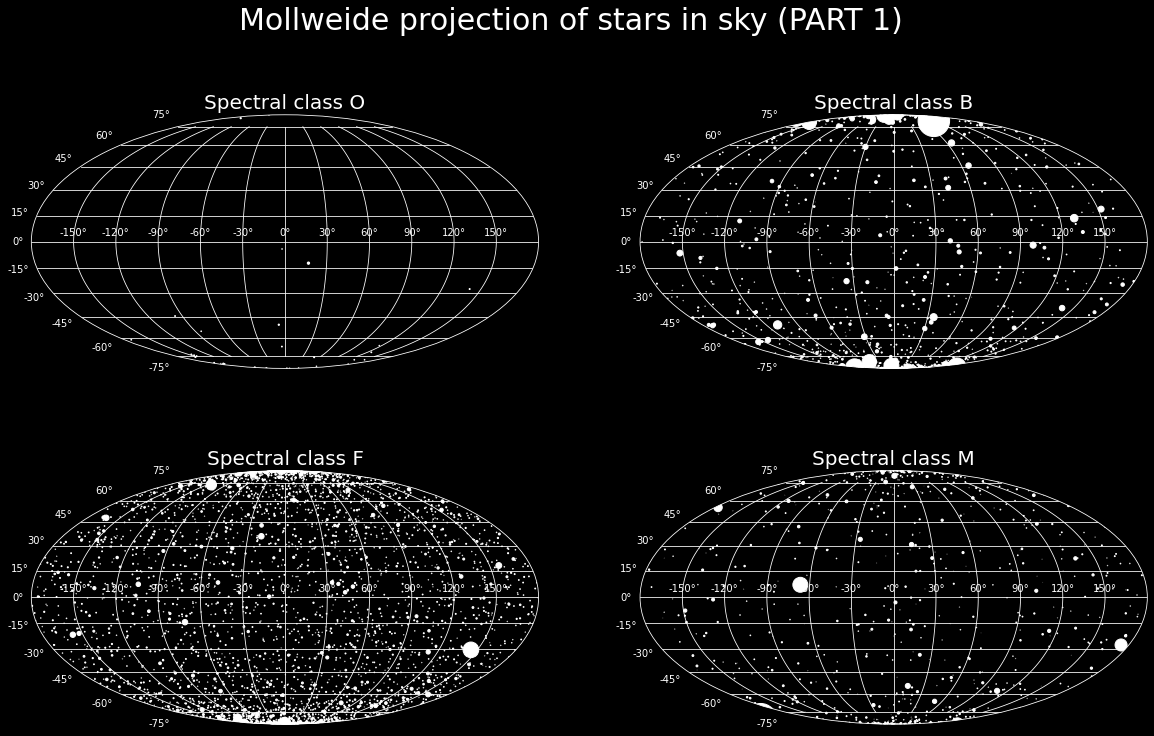

In [71]:
# PLOT 1: Let's plot...
plt.style.use(['dark_background']) # For dark background
fig1 = plt.figure(figsize=(20,12))
fig1.suptitle('Mollweide projection of stars in sky (PART 1)', fontsize=30)

# projection='mollweide' makes a Molleweide projection
ax1 = fig1.add_subplot(221, projection='mollweide')
ax2 = fig1.add_subplot(222, projection='mollweide')
ax3 = fig1.add_subplot(223, projection='mollweide')
ax4 = fig1.add_subplot(224, projection='mollweide')

# Plots the stars
ax1.scatter(o_ra, o_dec, c='white',s=o_ms)
ax2.scatter(b_ra, b_dec, c='white',s=b_ms)
ax3.scatter(f_ra, f_dec, c='white',s=f_ms)
ax4.scatter(m_ra, m_dec, c='white',s=m_ms)

# Giving appropriate title
ax1.set_title('Spectral class O', fontsize=20)
ax2.set_title('Spectral class B', fontsize=20)
ax3.set_title('Spectral class F', fontsize=20)
ax4.set_title('Spectral class M', fontsize=20)

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

Text(0.8, 0.84, 'Gamma Ray Bursts')

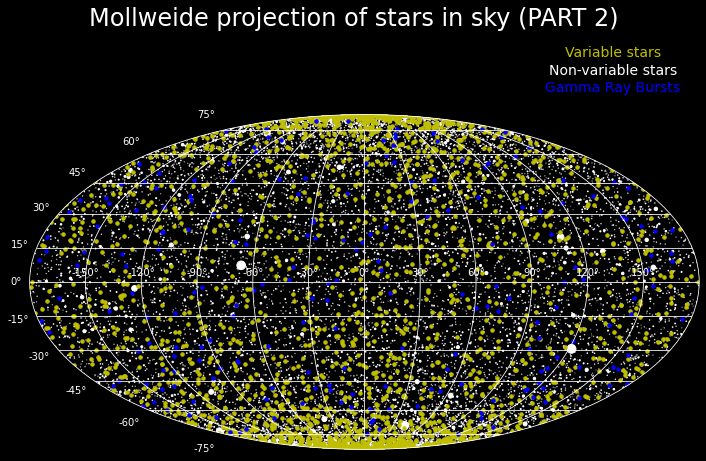

In [72]:
# PLOT 2: Let's plot, again...
fig1 = plt.figure(figsize=(12,8))
plt.style.use(['dark_background'])
fig1.suptitle('Mollweide projection of stars in sky (PART 2)', fontsize=24)

ax = fig1.add_subplot(111, projection='mollweide')
ax.grid(True)

# Scatter all the three things in order, non-variables, variables, GRBs
# (Order matters else non-variables overshadow GRBs)
ax.scatter(non_var_ra, non_var_dec, s=non_var_ms, c='white')
ax.scatter(var_ra, var_dec, s=12, c='y')
ax.scatter(grb_ra, grb_dec, s=12, c='b')

# Making the legend for the colors
fig1.text(0.8, 0.9, 'Variable stars', ha='center', va='center', c='y', size=14)
fig1.text(0.8, 0.87, 'Non-variable stars', ha='center', va='center', c='w', size=14)
fig1.text(0.8, 0.84, 'Gamma Ray Bursts', ha='center', va='center', c='b', size=14)

In [12]:
# Get the plots
plt.show()

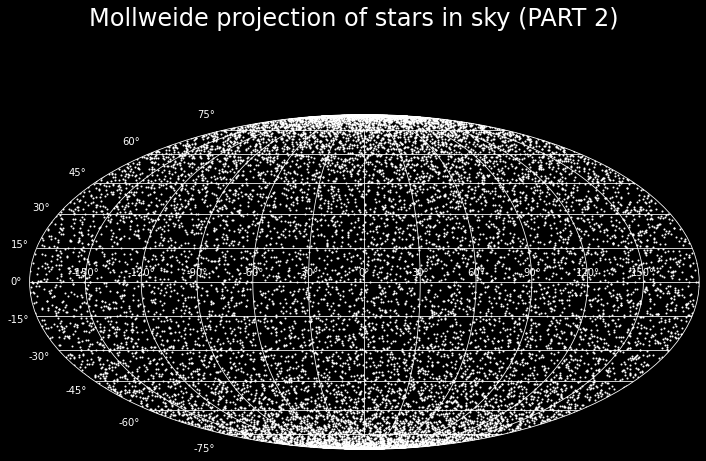

In [74]:
# PLOT 2: Let's plot, again...
fig1 = plt.figure(figsize=(12,8))
plt.style.use(['dark_background'])
fig1.suptitle('Mollweide projection of stars in sky (PART 2)', fontsize=24)

ax = fig1.add_subplot(111, projection='mollweide')
ax.grid(True)

# Scatter all the three things in order, non-variables, variables, GRBs
# (Order matters else non-variables overshadow GRBs)
ax.scatter(ra,dec, s=1, c='white')


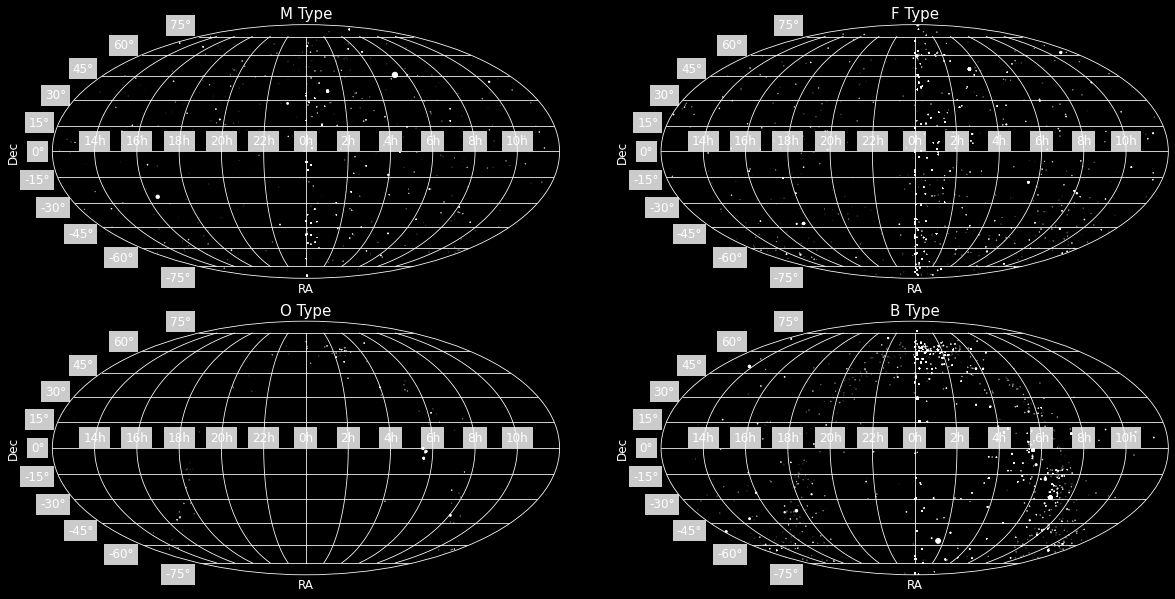

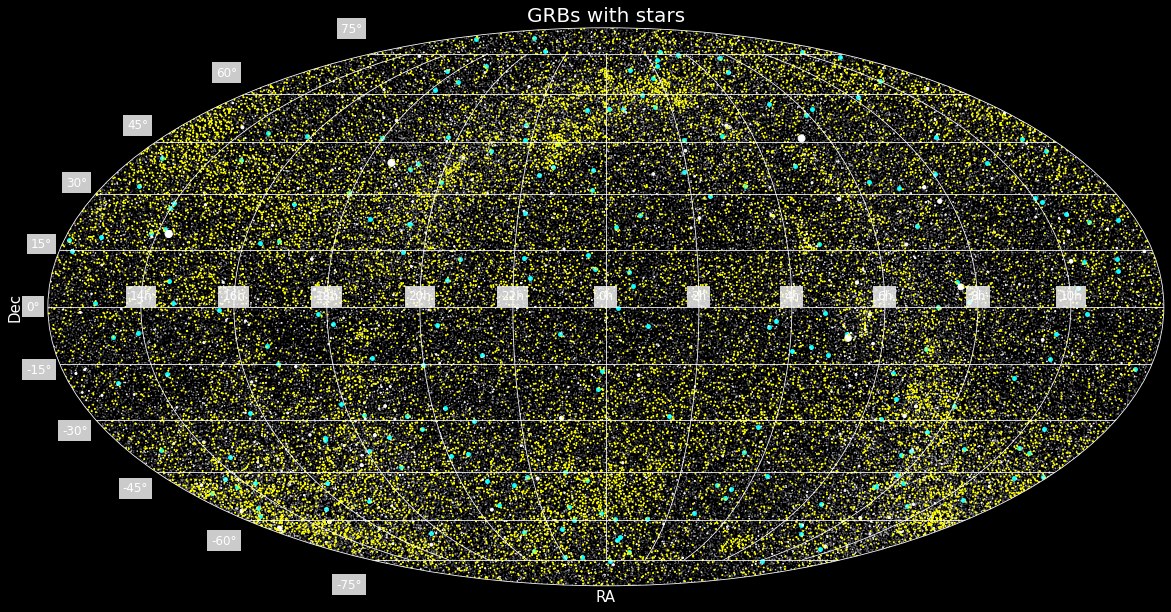

In [77]:
#!/usr/bin/env python
# coding: utf-8

# In[3]:


import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup

#-------------------------------------PART 1-----------------------------------------

#Creating a list with lines of file as elements
with open('hygdata_v3.csv','r') as f:
    lines=f.read().split('\n')
del lines[0]
data_stars=[]
for line in lines:
    data_stars.append(line.split(','))
data_stars.remove([''])

#Storing required data in respective lists
ra=[]; dec=[]; mag=[]; spect=[]; is_var=[]
for item in data_stars:
    ra.append(float(item[7]))
    dec.append(float(item[8]))
    mag.append(float(item[13]))
    spect.append(item[15])
    if(len(item[35])!=0):
        is_var.append(1) #Given star is a variable
    else:
        is_var.append(0) #Given star is not a variable


#Storing IDs of stars of specific spectral type
M_index=[];O_index=[]; B_index=[]; F_index=[]
for item in spect:
    if (len(item)!=0):
        if(item[0]=='M' or item[0]=='m'):
            M_index.append(spect.index(item))
        if(item[0]=='O' or item[0]=='o'):
            O_index.append(spect.index(item))
        if(item[0]=='B' or item[0]=='b'):
            B_index.append(spect.index(item))
        if(item[0]=='F' or item[0]=='f'):
            F_index.append(spect.index(item))


#Converting the required to arrays
ra=np.array(ra)
dec=np.array(dec)
mag=np.array(mag)
is_var=np.array(is_var)
F_index=np.array(F_index)
O_index=np.array(O_index)
B_index=np.array(B_index)
M_index=np.array(M_index)


#Modifying the RA and Dec for Mollweide Projection
ra[ra>=12]=ra[ra>=12]-24
ra=np.pi*ra/12 #hrs to radians
dec=dec*np.pi/180 #degs to radians


#Calculating flux
flux=10**(-mag/2.5)


#Plotting
fig1=plt.figure(figsize=(20,20))


#Currently the flux factor for size has been kept the same for all 4 types, can be adjusted separately to make dimmer ones like O Type brighter

#Plotting O Type
axO=fig1.add_subplot(121, projection="mollweide",facecolor='black')
axO.scatter(ra[O_index],dec[O_index],s=flux[O_index]*30,c='white')
axO.set(title='O Type')
axO.grid(c='w')
axO.title.set_fontsize(15)
axO.set_xlabel("RA")
axO.xaxis.label.set_fontsize(12)
axO.set_ylabel("Dec")
axO.yaxis.label.set_fontsize(12)
axO.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in axO.get_xticklabels() + axO.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))

##Plotting B Type
axB=fig1.add_subplot(122, projection="mollweide",facecolor='black')
axB.scatter(ra[B_index],dec[B_index],s=flux[B_index]*30,c='white')
axB.set(title='B Type')
axB.grid(c='w')
axB.title.set_fontsize(15)
axB.set_xlabel("RA")
axB.xaxis.label.set_fontsize(12)
axB.set_ylabel("Dec")
axB.yaxis.label.set_fontsize(12)
axB.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in axB.get_xticklabels() + axB.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))

#Plotting M Type
axM=fig1.add_subplot(221, projection="mollweide",facecolor='black')
axM.scatter(ra[M_index],dec[M_index],s=flux[M_index]*30,c='white')
axM.set(title='M Type')
axM.grid(c='w')
axM.title.set_fontsize(15)
axM.set_xlabel("RA")
axM.xaxis.label.set_fontsize(12)
axM.set_ylabel("Dec")
axM.yaxis.label.set_fontsize(12)
axM.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in axM.get_xticklabels() + axM.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))

#Plotting F Type
axF=fig1.add_subplot(222, projection="mollweide",facecolor='black')
axF.scatter(ra[F_index],dec[F_index],s=flux[F_index]*30,c='white')
axF.set(title='F Type')
axF.grid(c='w')
axF.title.set_fontsize(15)
axF.set_xlabel("RA")
axF.xaxis.label.set_fontsize(12)
axF.set_ylabel("Dec")
axF.yaxis.label.set_fontsize(12)
axF.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in axF.get_xticklabels() + axF.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))


#----------------------------------------PART 2-----------------------------------------------------

#Accessing the page
page = requests.get("http://astrosat.iucaa.in/czti/?q=grb")
soup = BeautifulSoup(page.content, 'html.parser')

#Collecting data from the page
ra_grb=[]
dec_grb=[]
for i in range(1,298):
    radec=soup.find_all('td') [10+7*(i-1)].get_text() #The required values occur at intervals of 7, i.e. 10,17,24..
    if(',' in radec):
        if(radec[5]!='-'):
            ra_grb.append(float(radec[5:radec.index(',')])) #Stored RA in degs
            dec_grb.append(float(radec[radec.index(',')+1:])) #Stored Dec in degs
ra_grb=np.array(ra_grb)
dec_grb=np.array(dec_grb)


#Modifying the RA and Dec for Mollweide Projection
ra_grb[ra_grb>=180]=ra_grb[ra_grb>=180]-360
ra_grb=ra_grb*np.pi/180
dec_grb=dec_grb*np.pi/180


#Plotting all the enteties
#Marker size for variables has been kept constant but not equal to GRBs because of the difference in quantities which maked fig dirty
fig2=plt.figure(figsize=(20,20))
ax=fig2.add_subplot(projection="mollweide",facecolor='black')
ax.scatter(ra_grb,dec_grb,c='aqua',s=15) #Plotting GRBs
ax.scatter(ra,dec,s=flux*50*(1-is_var),c='white') #Plotting non variable stars
ax.scatter(ra,dec,s=1*is_var,c='yellow') #Plotting variable stars
ax.set(title='GRBs with stars')
ax.grid(c='w')
ax.title.set_fontsize(20)
ax.set_xlabel("RA")
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel("Dec")
ax.yaxis.label.set_fontsize(15)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))
